In [24]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from torch import nn, optim
import torch.nn.functional as F
import torch.utils.data as data
import torch
from torch.autograd import Variable

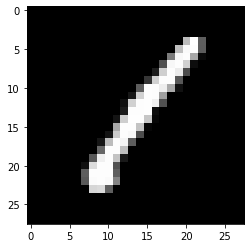

In [25]:
df = pd.read_csv("train.csv")
plt.imshow(np.reshape(df.values[0][1:],(28,28)), cmap=plt.get_cmap('gray'))
plt.show()

In [27]:
train = pd.read_csv("train.csv")
train_labels = train['label'].values
train = train.drop("label",axis=1).values.reshape(len(train),1,28,28)

In [28]:
X = torch.Tensor(train.astype(float))
y = torch.Tensor(train_labels).long()

In [29]:
class MNISTClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 392)
        self.fc2 = nn.Linear(392, 196)
        self.fc3 = nn.Linear(196, 98)
        self.fc4 = nn.Linear(98, 10)
        
        self.dropout = nn.Dropout(p=0.2)
        
    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [30]:
model = MNISTClassifier()
loss_function = nn.NLLLoss()
opt = optim.Adam(model.parameters(), lr=0.001)

In [43]:
for epoch in range(110):
    
    images = Variable(X)
    labels = Variable(y)

    opt.zero_grad()
    outputs = model(images)

    loss = loss_function(outputs, labels)
    loss.backward()
    opt.step()

    print ('Epoch [%d/%d] Loss: %.4f' %(epoch+1, 50, loss.data.item()))

Epoch [1/50] Loss: 0.0010
Epoch [2/50] Loss: 0.0012
Epoch [3/50] Loss: 0.0008
Epoch [4/50] Loss: 0.0061
Epoch [5/50] Loss: 0.0039
Epoch [6/50] Loss: 0.0029
Epoch [7/50] Loss: 0.0030
Epoch [8/50] Loss: 0.0005
Epoch [9/50] Loss: 0.0014
Epoch [10/50] Loss: 0.0015
Epoch [11/50] Loss: 0.0023
Epoch [12/50] Loss: 0.0031
Epoch [13/50] Loss: 0.0058
Epoch [14/50] Loss: 0.0013
Epoch [15/50] Loss: 0.0016
Epoch [16/50] Loss: 0.0008
Epoch [17/50] Loss: 0.0030
Epoch [18/50] Loss: 0.0005
Epoch [19/50] Loss: 0.0070
Epoch [20/50] Loss: 0.0020
Epoch [21/50] Loss: 0.0022
Epoch [22/50] Loss: 0.0023
Epoch [23/50] Loss: 0.0010
Epoch [24/50] Loss: 0.0022
Epoch [25/50] Loss: 0.0024
Epoch [26/50] Loss: 0.0014
Epoch [27/50] Loss: 0.0058
Epoch [28/50] Loss: 0.0043
Epoch [29/50] Loss: 0.0004
Epoch [30/50] Loss: 0.0023
Epoch [31/50] Loss: 0.0016
Epoch [32/50] Loss: 0.0019
Epoch [33/50] Loss: 0.0014
Epoch [34/50] Loss: 0.0020
Epoch [35/50] Loss: 0.0006
Epoch [36/50] Loss: 0.0014
Epoch [37/50] Loss: 0.0006
Epoch [38/

In [46]:
test = pd.read_csv("test.csv")
test_labels = test['label'].values
test = test.drop("label",axis=1).values.reshape(len(test),1,28,28)

X_test = torch.Tensor(test.astype(float))
y_test = torch.Tensor(test_labels).long()


In [47]:
preds = model(X_test)

In [48]:
print(preds[1])

tensor([-1.1283e+01, -6.9190e+00, -1.0573e+01, -8.5534e+00, -9.8752e+00,
        -5.9814e-03, -6.7524e+00, -1.3279e+01, -5.6623e+00, -9.9451e+00],
       grad_fn=<SelectBackward0>)


In [49]:
_, predictionlabel = torch.max(preds.data, 1)
predictionlabel = predictionlabel.tolist()

predictionlabel = pd.Series(predictionlabel)
test_labels = pd.Series(test_labels)

pred_table = pd.concat([predictionlabel, test_labels], axis=1)
pred_table.columns =['Predicted Value', 'True Value']

display(pred_table.head())

Predicted Value  True Value
0                9           9
1                5           5
2                2           2
3                4           4
4                1           1

In [51]:
preds = len(predictionlabel)
correct = len([1 for x,y in zip(predictionlabel, test_labels) if x==y])
print((correct/preds)*100)

91.5
